In [65]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

In [5]:
dataset=make_blobs(n_samples=300,n_features=2,centers=2)

In [26]:
X,y =dataset

In [39]:
df=pd.DataFrame(X)
X.shape

(300, 2)

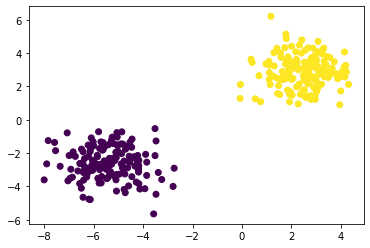

In [41]:
plt.scatter(df[0],df[1],c=y)

In [42]:
z_noise=np.random.normal(size=len(X))
z_series=pd.Series(z_noise)

In [43]:
df=pd.concat([df,z_series],axis=1)

In [44]:
df.columns=["X1","X2","X3"]

In [45]:
df

,X1,X2,X3
0,-4.623985,-1.585030,-0.957743
1,2.212172,1.966724,0.073355
2,-6.432605,-1.916778,0.163367
3,-4.821694,-1.458018,0.098058
4,-6.568737,-3.826441,1.126906
...,...,...,...
295,2.151450,3.245968,-0.205266
296,2.527011,1.777811,-1.452356
297,2.923188,3.825854,1.084732
298,-5.064358,-0.774346,-1.521561


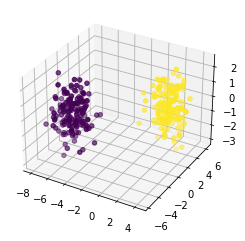

In [60]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.subplot(111,projection='3d')
ax.scatter(df['X1'],df['X2'],df['X3'],c=y)


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [63]:
#3--->2---->3 neurons

In [102]:
encoder= Sequential()
encoder.add(Dense(2,activation="relu",input_shape=[3]))

decoder=Sequential()
decoder.add(Dense(3,activation="relu",input_shape=[2]))

In [103]:
scaler=MinMaxScaler()
scaler_data=scaler.fit_transform(df)

In [104]:
model=Sequential([encoder,decoder])
model.compile(optimizer=SGD(learning_rate=1.5),loss="mse")
model.fit(scaler_data,scaler_data,epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 2ms/step - loss: 0.1602
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1471
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.1252
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 0.1121
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0196
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.0220
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 0.0231
Epoch 8/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0228
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0220
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0209


In [105]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_18 (Sequential)  (None, 2)                 8         
                                                                 
 sequential_19 (Sequential)  (None, 3)                 9         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [106]:
predictions=model.predict(scaler_data)

In [107]:
predictions.shape

(300, 3)

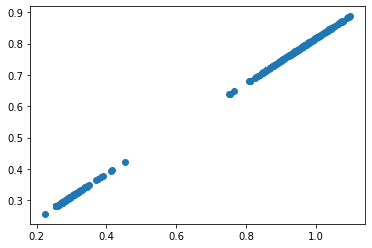

In [108]:
plt.scatter(predictions[:,0],predictions[:,1])

In [109]:
predictions[:,0].shape

(300,)